In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [7]:
df =pd.read_csv('titanic_toy.csv')
df

Age     Fare  Family  Survived
0    22.0   7.2500       1         0
1    38.0  71.2833       1         1
2    26.0   7.9250       0         1
3    35.0  53.1000       1         1
4    35.0   8.0500       0         0
..    ...      ...     ...       ...
886  27.0  13.0000       0         0
887  19.0  30.0000       0         1
888   NaN  23.4500       3         0
889  26.0      NaN       0         1
890  32.0   7.7500       0         0

[891 rows x 4 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [11]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [13]:
X =df.drop(columns =['Survived'] ,axis =1)
Y = df['Survived']

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [19]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [21]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [25]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()
mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'] .median()

In [27]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [31]:
X_train.sample(7)

Age    Fare  Family   Age_mean  Age_median  Fare_mean  Fare_median
488  30.0   8.050       0  30.000000       30.00      8.050        8.050
480   9.0  46.900       7   9.000000        9.00     46.900       46.900
244  30.0   7.225       0  30.000000       30.00      7.225        7.225
243  22.0   7.125       0  22.000000       22.00      7.125        7.125
249  54.0  26.000       1  54.000000       54.00     26.000       26.000
592  47.0   7.250       0  47.000000       47.00      7.250        7.250
284   NaN  26.000       0  29.785904       28.75     26.000       26.000

In [33]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())


Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.0910219753637
Fare Variance after mean imputation:  2324.2385256705547


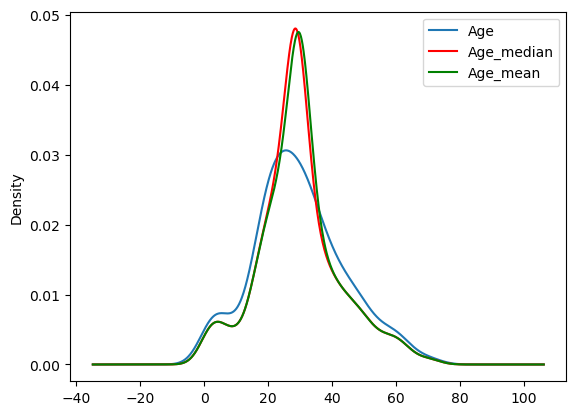

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

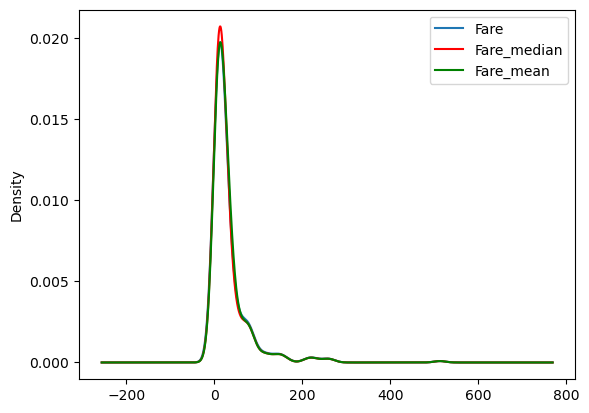

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [39]:
X_train.cov()

Age         Fare     Family    Age_mean  Age_median  \
Age          204.349513    70.719262  -6.498901  204.349513  204.349513   
Fare          70.719262  2448.197914  17.258917   55.603719   57.957599   
Family        -6.498901    17.258917   2.735252   -5.146106   -5.112563   
Age_mean     204.349513    55.603719  -5.146106  161.812625  161.812625   
Age_median   204.349513    57.957599  -5.112563  161.812625  161.989566   
Fare_mean     66.665205  2448.197914  16.385048   52.788341   55.023037   
Fare_median   64.858859  2448.197914  16.476305   51.358000   53.553455   

               Fare_mean  Fare_median  
Age            66.665205    64.858859  
Fare         2448.197914  2448.197914  
Family         16.385048    16.476305  
Age_mean       52.788341    51.358000  
Age_median     55.023037    53.553455  
Fare_mean    2324.238526  2324.238526  
Fare_median  2324.238526  2340.091022

In [41]:
X_train.corr()

Age      Fare    Family  Age_mean  Age_median  Fare_mean  \
Age          1.000000  0.092644 -0.299113  1.000000    1.000000   0.090156   
Fare         0.092644  1.000000  0.208268  0.088069    0.091757   1.000000   
Family      -0.299113  0.208268  1.000000 -0.244610   -0.242883   0.205499   
Age_mean     1.000000  0.088069 -0.244610  1.000000    0.999454   0.086078   
Age_median   1.000000  0.091757 -0.242883  0.999454    1.000000   0.089673   
Fare_mean    0.090156  1.000000  0.205499  0.086078    0.089673   1.000000   
Fare_median  0.087356  1.000000  0.205942  0.083461    0.086982   0.996607   

             Fare_median  
Age             0.087356  
Fare            1.000000  
Family          0.205942  
Age_mean        0.083461  
Age_median      0.086982  
Fare_mean       0.996607  
Fare_median     1.000000

<Axes: >

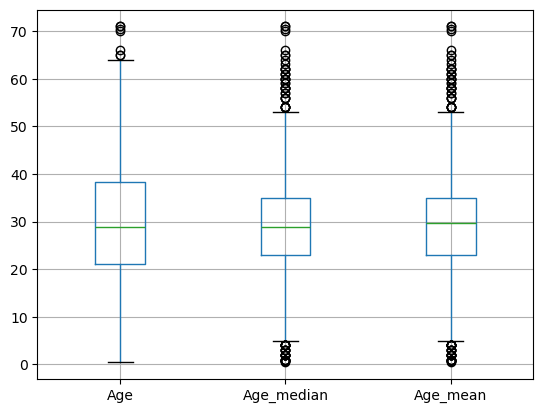

In [43]:
X_train[['Age', 'Age_median','Age_mean']].boxplot()

<Axes: >

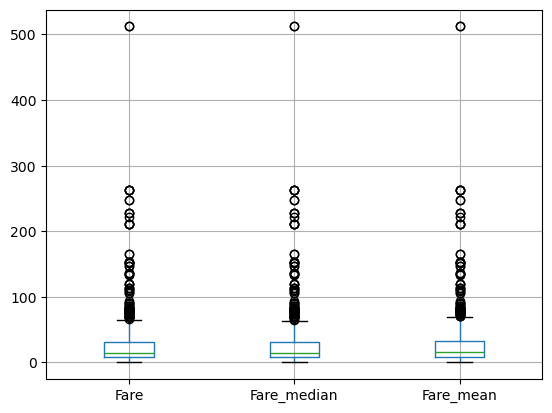

In [45]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()


## USing Sklearn

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [52]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')


In [69]:

trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [71]:
trf.fit(X_train)

C:\Users\DELL\Documents\New folder\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [77]:
trf.named_transformers_['imputer1'].statistics_  # median value hai age ki

array([28.75])

In [79]:
trf.named_transformers_['imputer2'].statistics_ # mean value hai fare ki

array([32.61759689])

In [81]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [83]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

## Arbitary Value Imputation

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [90]:
df = pd.read_csv('titanic_toy.csv')
df

Age     Fare  Family  Survived
0    22.0   7.2500       1         0
1    38.0  71.2833       1         1
2    26.0   7.9250       0         1
3    35.0  53.1000       1         1
4    35.0   8.0500       0         0
..    ...      ...     ...       ...
886  27.0  13.0000       0         0
887  19.0  30.0000       0         1
888   NaN  23.4500       3         0
889  26.0      NaN       0         1
890  32.0   7.7500       0         0

[891 rows x 4 columns]

In [92]:
df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [94]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [96]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [98]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [100]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] =X_train['Age'].fillna(-1)

X_train['Fare_99'] = X_train['Fare'].fillna(99)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [104]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 99 wala imputation: ', X_train['Fare_99'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after 99 wala imputation:  2536.0773428319685
Fare Variance after -1 wala imputation:  2378.5676784883503


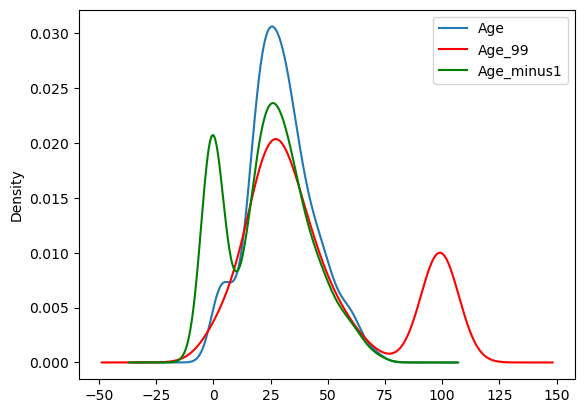

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

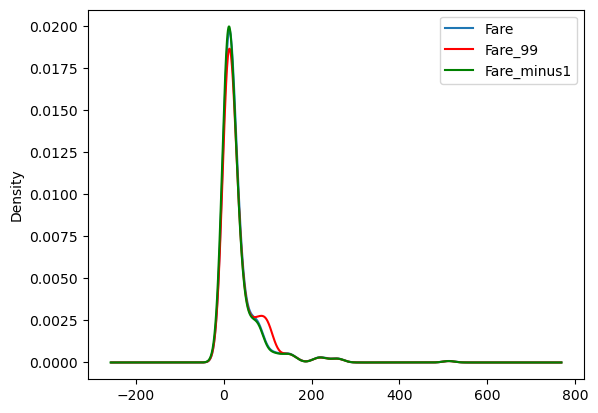

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [112]:
X_train.cov()

Age         Fare     Family      Age_99  Age_minus1  \
Age          204.349513    70.719262  -6.498901  204.349513  204.349513   
Fare          70.719262  2448.197914  17.258917 -101.671097  125.558364   
Family        -6.498901    17.258917   2.735252   -7.387287   -4.149246   
Age_99       204.349513  -101.671097  -7.387287  951.727557 -189.535540   
Age_minus1   204.349513   125.558364  -4.149246 -189.535540  318.089620   
Fare_99       73.268412  2448.197914  16.051452 -100.878826  128.692715   
Fare_minus1   63.321188  2448.197914  16.553989  -94.317400  114.394141   

                 Fare_99  Fare_minus1  
Age            73.268412    63.321188  
Fare         2448.197914  2448.197914  
Family         16.051452    16.553989  
Age_99       -100.878826   -94.317400  
Age_minus1    128.692715   114.394141  
Fare_99      2536.077343  2216.958409  
Fare_minus1  2216.958409  2378.567678

In [114]:
X_train.corr()

Age      Fare    Family    Age_99  Age_minus1   Fare_99  \
Age          1.000000  0.092644 -0.299113  1.000000    1.000000  0.095527   
Fare         0.092644  1.000000  0.208268 -0.066273    0.142022  1.000000   
Family      -0.299113  0.208268  1.000000 -0.144787   -0.140668  0.192723   
Age_99       1.000000 -0.066273 -0.144787  1.000000   -0.344476 -0.064933   
Age_minus1   1.000000  0.142022 -0.140668 -0.344476    1.000000  0.143284   
Fare_99      0.095527  1.000000  0.192723 -0.064933    0.143284  1.000000   
Fare_minus1  0.084585  1.000000  0.205233 -0.062687    0.131514  0.902648   

             Fare_minus1  
Age             0.084585  
Fare            1.000000  
Family          0.205233  
Age_99         -0.062687  
Age_minus1      0.131514  
Fare_99         0.902648  
Fare_minus1     1.000000

## using sklearn

In [117]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [121]:
imputer1 = SimpleImputer(strategy  = 'constant' ,fill_value =99)    
imputer2 = SimpleImputer(strategy = 'constant' ,fill_value =999)

In [127]:
trf = ColumnTransformer([
      ('imputer1',imputer1,['Age']),
      ('imputer2', imputer2,['Fare'])
],remainder= 'passthrough')
      

In [129]:
trf.fit(X_train)

C:\Users\DELL\Documents\New folder\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [135]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [137]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [139]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [141]:

X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])